In [6]:
import nibabel as nib
import nilearn.plotting as niplt
%matplotlib inline
import numpy as np
from pylab import *

In [12]:
rois=rois=['PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC','HG','V1']
parcel2roi=np.load('/jukebox/griffiths/bert-brains/black_data/Parcel2ROI.npy')
parcellation_nii=nib.load('/jukebox/griffiths/bert-brains/black_data/Schaefer1000_3mm.nii.gz')
parcellation=parcellation_nii.get_fdata().astype('int')
for p in range(1000):
    parcellation[np.where(parcellation==p+1)]=parcel2roi[p]
for roi in range(10):
    volume=np.zeros(parcellation.shape)
    volume[parcellation==roi+1]=1 
    niplt.plot_glass_brain(nib.Nifti1Image(volume,parcellation_nii.affine),title=rois[roi],display_mode='l',output_file='plots/roi_brains/'+rois[roi]+".svg")


TypeError: can only concatenate str (not "int") to str

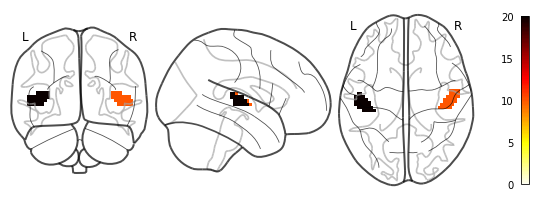

<Figure size 432x288 with 0 Axes>

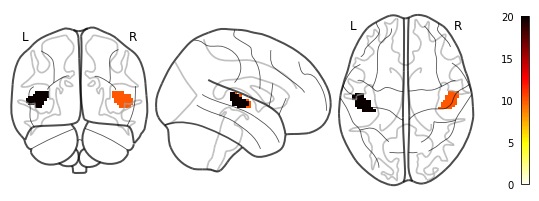

In [2]:
"""
img=nib.load('/usr/people/sreejank/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz')
x=img.get_fdata()
x[x!=45]=0
idxs=np.where(x==45)
for i in range(len(idxs[0])):
    a,b,c=idxs[0][i],idxs[1][i],idxs[2][i]
    if a<30:
        x[a,b,c]=10
    else:
        x[a,b,c]=20
niplt.plot_glass_brain(nib.Nifti1Image(x,img.affine),colorbar=True)
nib.save(nib.Nifti1Image(x,img.affine),"/jukebox/griffiths/bert-brains/HeschlROI_2mm.nii.gz")
"""

niplt.plot_glass_brain("/jukebox/griffiths/bert-brains/slumlordreach_data/HeschlROI_3mm.nii.gz",colorbar=True)
plt.figure()
niplt.plot_glass_brain("/jukebox/griffiths/bert-brains/black_data/HeschlROI_3mm.nii.gz",colorbar=True)


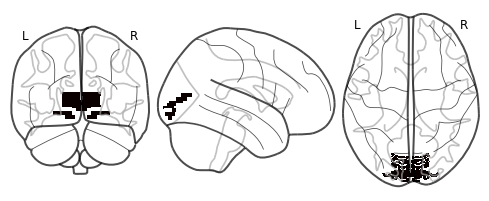

In [3]:
niplt.plot_glass_brain('/jukebox/griffiths/bert-brains/v1_mask_big.nii')

In [5]:
labels=np.genfromtxt('/scratch/sreejank/CBIG-0.17.1-Schaefer2018_LocalGlobal/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Schaefer2018_1000Parcels_17Networks_order.txt',dtype=str)[:,1]

In [1]:
def plot_parcels(parcel_lst):
    dataset='black'
    parcel_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Schaefer1000_3mm.nii.gz')
    parcellation=parcel_img.get_fdata().astype('int')
    volume=np.zeros(parcellation.shape)
    volume[parcellation>0]+=0.05
    for p in parcel_lst:
        volume[np.where(parcellation==p)]=p 
    return nib.Nifti1Image(volume,parcel_img.affine)

def illuminate_coord(coord):
    dataset='black'
    parcel_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Schaefer1000_3mm.nii.gz')
    parcellation=parcel_img.get_fdata().astype('int')
    volume=np.zeros(parcellation.shape)
    volume[coord[0]-3:coord[0]+4,coord[1]-3:coord[1]+4,coord[2]-3:coord[2]+4]=1
    return nib.Nifti1Image(volume,parcel_img.affine)

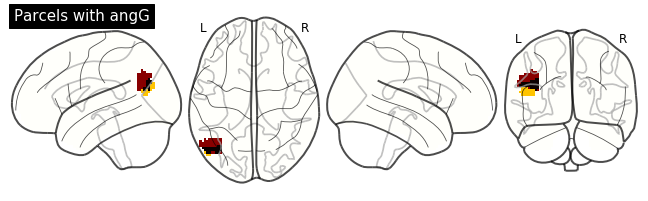

<Figure size 432x288 with 0 Axes>

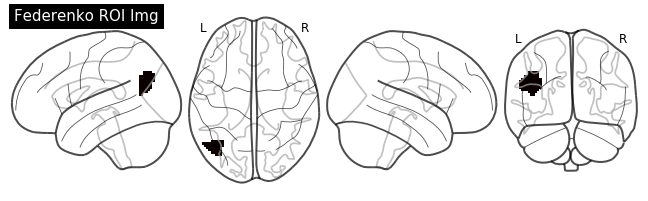

In [30]:
def plot_parcels(parcel_lst):
    dataset='black'
    parcel_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Schaefer1000_3mm.nii.gz')
    parcellation=parcel_img.get_fdata().astype('int')
    volume=np.zeros(parcellation.shape)
    volume[parcellation>0]+=0.05
    for p in parcel_lst:
        volume[np.where(parcellation==p)]=p 
    return nib.Nifti1Image(volume,parcel_img.affine)
parcel2roi=np.load('/jukebox/griffiths/bert-brains/black_data/Parcel2ROI.npy')
niplt.plot_glass_brain(plot_parcels(np.where(parcel2roi==3)[0]+1),display_mode='lzry',title="Parcels with angG")
plt.figure()
affine=nib.load('/jukebox/griffiths/bert-brains/black_data/Federenko_3mm.nii.gz').affine
angG_mask=(nib.load('/jukebox/griffiths/bert-brains/black_data/Federenko_3mm.nii.gz').get_fdata()==3).astype('int')
niplt.plot_glass_brain(nib.Nifti1Image(angG_mask,affine),display_mode='lzry',title='Federenko ROI Img')

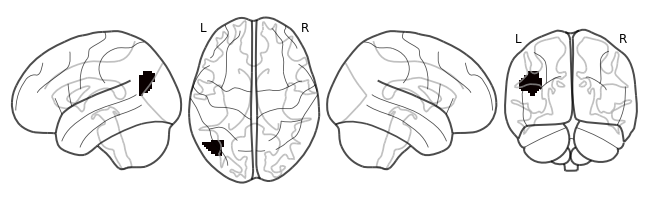

In [25]:
affine=nib.load('/jukebox/griffiths/bert-brains/black_data/Federenko_3mm.nii.gz').affine
angG_mask=(nib.load('/jukebox/griffiths/bert-brains/black_data/Federenko_3mm.nii.gz').get_fdata()==3).astype('int')
niplt.plot_glass_brain(nib.Nifti1Image(angG_mask,affine),display_mode='lzry')


In [ ]:
niplt.plot_glass_brain()

In [4]:
lst=[x+1 for x in range(len(labels)) if 'PFC' in labels[x]]
lst1=[i for i in lst if 'RH' in labels[i-1]]
print(lst1)

[775, 776, 777, 778, 779, 780, 781, 782, 792, 793, 794, 795, 796, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 921, 922, 923, 924, 925, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968]


(78, 93, 78)

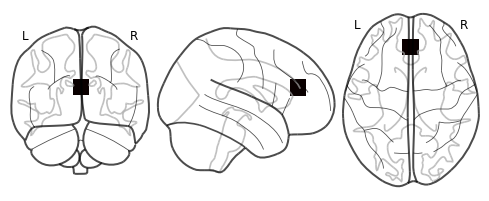

In [21]:
niplt.plot_glass_brain(illuminate_coord((39,69,39)))

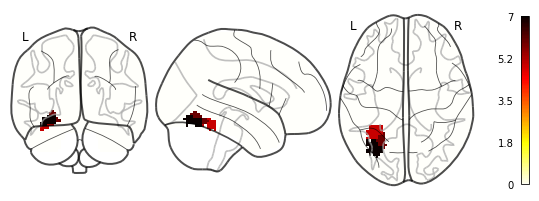

In [6]:
niplt.plot_glass_brain(plot_parcels([5,6,7]),colorbar=True)

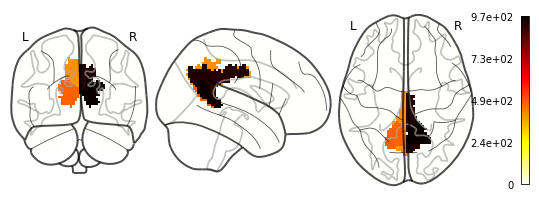

In [111]:
niplt.plot_glass_brain(plot_parcels([p+1 for p in range(len(labels)) if ('Default' in labels[p] and 'PFC' not in labels[p] and 'Temp' not in labels[p] and 'IPL' not in labels[p] and 'PHC' not in labels[p])]),colorbar=True)

((79, 95, 69), (78, 93, 78))

32512

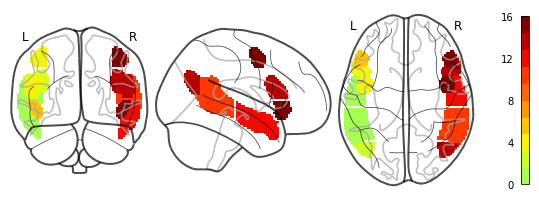

In [59]:
affine=nib.load('/jukebox/griffiths/bert-brains/LangParcels_n220_LH.img').affine
lh=np.round(nib.load('/jukebox/griffiths/bert-brains/LangParcels_n220_LH.img').get_fdata()).astype('int')
rh=np.round(nib.load('/jukebox/griffiths/bert-brains/LangParcels_n220_RH.img').get_fdata()).astype('int')
rh[rh>0]+=10
fed_roi_img=nib.Nifti1Image((lh+rh).astype('float'),affine)

cmap = cm.get_cmap('jet', 21) 

niplt.plot_glass_brain(fed_roi_img,colorbar=True,cmap=cmap)
nib.save(fed_roi_img,'/jukebox/griffiths/bert-brains/federenko_roi_raw.nii')
import os 
os.system('module load afni')
os.system('3dresample -input /jukebox/griffiths/bert-brains/federenko_roi_raw.nii -master /jukebox/griffiths/bert-brains/black_data/Schaefer1000_3mm.nii.gz -prefix /jukebox/griffiths/bert-brains/black_data/Federenko_3mm.nii.gz')
os.system('3dresample -input /jukebox/griffiths/bert-brains/federenko_roi_raw.nii -master /jukebox/griffiths/bert-brains/slumlordreach_data/Schaefer1000_3mm.nii.gz -prefix /jukebox/griffiths/bert-brains/slumlordreach_data/Federenko_3mm.nii.gz')

In [20]:
parcel_number=50



In [12]:
labels[2],labels[502],labels[37],labels[542],labels[41],labels[544]

('17Networks_LH_VisCent_Striate_3',
 '17Networks_RH_VisCent_Striate_3',
 '17Networks_LH_VisPeri_StriCal_4',
 '17Networks_RH_VisPeri_StriCal_4',
 '17Networks_LH_VisPeri_StriCal_8',
 '17Networks_RH_VisPeri_StriCal_6')

In [45]:
dataset='black'
parcel_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Schaefer1000_3mm.nii.gz')
parcel_volume=parcel_img.get_fdata().astype('int')
v1_mask=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/v1_mask_small.nii').get_fdata().astype('int')
L_v1_parcels=[]
R_v1_parcels=[]
for p in range(1000):
    parcel_number=p+1 
    num_voxels=np.sum(parcel_volume==parcel_number)
    num_v1=v1_mask[np.where(parcel_volume==parcel_number)].sum()
    #print(parcel_number,num_v1,num_voxels)
    
    if float(num_v1)/float(num_voxels)>=0.25:
        print(float(num_v1)/float(num_voxels))
        if 'LH' in labels[p]:
            L_v1_parcels.append(parcel_number)
        else:
            R_v1_parcels.append(parcel_number)
print(R_v1_parcels)
R_v1_parcels=[502,558]


0.28125
0.30120481927710846
0.2608695652173913
0.3582089552238806
0.25806451612903225
0.2702702702702703
[502, 545, 558]


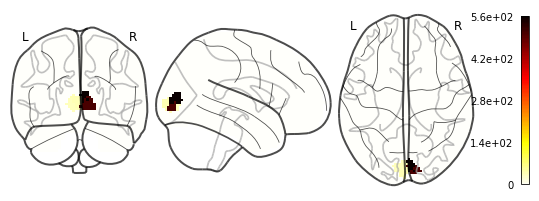

In [47]:
niplt.plot_glass_brain(plot_parcels(L_v1_parcels+R_v1_parcels),colorbar=True)

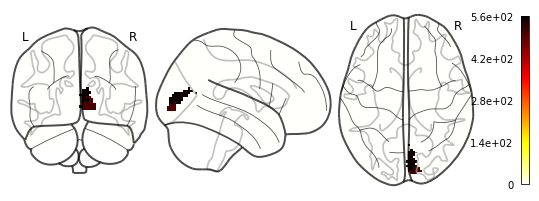

In [12]:
niplt.plot_glass_brain(plot_parcels(R_v1_parcels),colorbar=True)

In [48]:
for dataset in ['slumlordreach','black']:
    parcel_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Schaefer1000_3mm.nii.gz')
    parcel_volume=parcel_img.get_fdata().astype('int')
    roi_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Federenko_3mm.nii.gz')
    roi_volume=roi_img.get_fdata().astype('int')

    all_pfc=[i+1 for i in range(len(labels)) if 'PFC' in labels[i]]

    z_coords=[np.mean(np.where(parcel_volume==p)[2]) for p in all_pfc]
    y_coords=[np.mean(np.where(parcel_volume==p)[1]) for p in all_pfc]
    threshold=parcel_volume.shape[2]/2.0
    threshold2=parcel_volume.shape[1]*.75
    vm_pfc=[all_pfc[i] for i in range(len(all_pfc)) if (z_coords[i]<=threshold and y_coords[i]>threshold2)]
    dm_pfc=[all_pfc[i] for i in range(len(all_pfc)) if (z_coords[i]>threshold and y_coords[i]>threshold2)]

    vm_lh_pfc=[p for p in vm_pfc if 'LH' in labels[p-1]]
    vm_rh_pfc=[p for p in vm_pfc if 'RH' in labels[p-1]]
    dm_lh_pfc=[p for p in dm_pfc if 'LH' in labels[p-1]]
    dm_rh_pfc=[p for p in dm_pfc if 'RH' in labels[p-1]]
    
    pmc=[p+1 for p in range(len(labels)) if ('Default' in labels[p] and 'PFC' not in labels[p] and 'Temp' not in labels[p] and 'IPL' not in labels[p] and 'PHC' not in labels[p])]
    pmc_lh=[p for p in pmc if 'LH' in labels[p-1]]
    pmc_rh=[p for p in pmc if 'RH' in labels[p-1]]

    heschl_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/HeschlROI_3mm.nii.gz')
    heschl_voxels=heschl_img.get_fdata().astype('int')
    roi_volume[heschl_voxels==10]=20
    roi_volume[heschl_voxels==20]=10



    for p in vm_lh_pfc:
        if np.sum(roi_volume[np.where(parcel_volume==p)]==0)>=np.prod(roi_volume[np.where(parcel_volume==p)].shape)*0.7:
            roi_volume[np.where(parcel_volume==p)]=7
    for p in dm_lh_pfc:
        if np.sum(roi_volume[np.where(parcel_volume==p)]==0)>=np.prod(roi_volume[np.where(parcel_volume==p)].shape)*0.7:
            roi_volume[np.where(parcel_volume==p)]=8
    for p in vm_rh_pfc:
        if np.sum(roi_volume[np.where(parcel_volume==p)]==0)>=np.prod(roi_volume[np.where(parcel_volume==p)].shape)*0.7:
            roi_volume[np.where(parcel_volume==p)]=7+10
    for p in dm_rh_pfc:
        if np.sum(roi_volume[np.where(parcel_volume==p)]==0)>=np.prod(roi_volume[np.where(parcel_volume==p)].shape)*0.7:
            roi_volume[np.where(parcel_volume==p)]=8+10
    
    for p in pmc_lh:
        if np.sum(roi_volume[np.where(parcel_volume==p)]==0)>=np.prod(roi_volume[np.where(parcel_volume==p)].shape)*0.7:
            roi_volume[np.where(parcel_volume==p)]=9
    
    for p in pmc_rh:
        if np.sum(roi_volume[np.where(parcel_volume==p)]==0)>=np.prod(roi_volume[np.where(parcel_volume==p)].shape)*0.7:
            roi_volume[np.where(parcel_volume==p)]=9+10


    #niplt.plot_glass_brain(nib.Nifti1Image(heschl_voxels,heschl_img.affine),colorbar=True)
    #niplt.plot_glass_brain(nib.Nifti1Image((roi_volume==10).astype('float'),heschl_img.affine))



    
    
    parcels_to_roi=np.zeros((1000,))
    for p in range(1000):
        counts=np.zeros((20,))
        roi_parcel=roi_volume[np.where(parcel_volume==p+1)]
        for roi in range(20):
            counts[roi]=np.sum(roi_parcel==roi+1)
        best_roi=np.argmax(counts)
        best_count=counts[best_roi]
        num_parcel_voxels=np.sum(parcel_volume==p+1)
        if best_count>=num_parcel_voxels*0.4:
            parcels_to_roi[p]=best_roi+1 
    
    parcels_to_roi[parcels_to_roi>=11]+=1

    for parcel_number in L_v1_parcels:
        parcels_to_roi[parcel_number-1]=11
    for parcel_number in R_v1_parcels:
        parcels_to_roi[parcel_number-1]=22



    np.save('/jukebox/griffiths/bert-brains/'+dataset+'_data/Parcel2ROI_new.npy',parcels_to_roi) 
    

In [27]:
L_v1_parcels

[3, 38, 42]

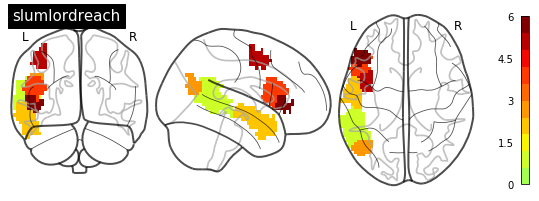

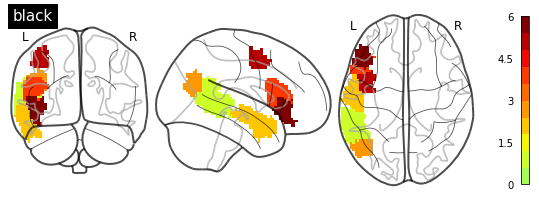

In [64]:
cmap = cm.get_cmap('jet', 21)
for dataset in ['slumlordreach','black']:
    parcel_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Schaefer1000_3mm.nii.gz')
    parcel_volume=parcel_img.get_fdata().astype('int')
    mapping=np.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Parcel2ROI.npy')
    roi_volume=np.zeros(parcel_volume.shape)
    for p in range(1000):
        if mapping[p] in [1,2,3,4,5,6]:
            roi_volume[np.where(parcel_volume==p+1)]=mapping[p]
    roi_img=nib.Nifti1Image(roi_volume,parcel_img.affine) 
    niplt.plot_glass_brain(roi_img,colorbar=True,cmap=cmap,title=dataset) 

In [121]:
new_rois=['vmPFC','dmPFC','PMC','Heschl']

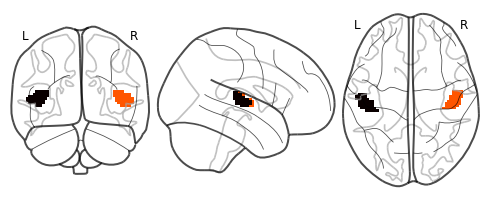

In [52]:
niplt.plot_glass_brain( heschl_img)